In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import utilssphering
import numpy as np

# Interesting features to look at 
- Number of cells analysed
- Number of conditions
- Number of features
- Total area of nuclei, total area of cells (how big is it?)
- Total number of conditions

In [ ]:
# Find number of features for each profile

experiment_df = pd.read_csv("output/all-profile-metadata.csv")

def num_features(metadata_df, profile_parent_dir):
    collection = {}
    for ind, a_vendor in enumerate(metadata_df["Vendor"].unique()):
        print(f"Processing {a_vendor}")
        vendor_data = metadata_df.loc[metadata_df["Vendor"] == a_vendor]
        for a_batch in vendor_data["Batch"].unique():
            batch_data = vendor_data.loc[vendor_data["Batch"] == a_batch]
            for a_plate in batch_data["Assay_Plate_Barcode"].unique():
                # plate_data = batch_data.loc[batch_data["Assay_Plate_Barcode"] == a_plate]
                data_path = os.path.join(profile_parent_dir, a_batch, a_plate, a_plate+"_normalized_feature_select_negcon_batch.csv.gz")
                load_data = pd.read_csv(data_path)
                cols = [i for i in load_data.columns if "metadata" not in i.casefold()]
                collection.update({f"{a_vendor}/{a_batch}/{a_plate}":len(cols)})
    return collection

t = num_features(experiment_df, "../jump-scope/profiles/")

In [4]:
df = pd.read_csv("checkpoints/match_rep_df.csv")

array([[<AxesSubplot:xlabel='Binning', ylabel='Binning'>,
        <AxesSubplot:xlabel='Magnification', ylabel='Binning'>,
        <AxesSubplot:xlabel='Number_of_channels', ylabel='Binning'>,
        <AxesSubplot:xlabel='z_plane', ylabel='Binning'>,
        <AxesSubplot:xlabel='aperture', ylabel='Binning'>,
        <AxesSubplot:xlabel='simultaneous-excitation', ylabel='Binning'>,
        <AxesSubplot:xlabel='sites', ylabel='Binning'>,
        <AxesSubplot:xlabel='cell_count', ylabel='Binning'>],
       [<AxesSubplot:xlabel='Binning', ylabel='Magnification'>,
        <AxesSubplot:xlabel='Magnification', ylabel='Magnification'>,
        <AxesSubplot:xlabel='Number_of_channels', ylabel='Magnification'>,
        <AxesSubplot:xlabel='z_plane', ylabel='Magnification'>,
        <AxesSubplot:xlabel='aperture', ylabel='Magnification'>,
        <AxesSubplot:xlabel='simultaneous-excitation', ylabel='Magnification'>,
        <AxesSubplot:xlabel='sites', ylabel='Magnification'>,
        <AxesSubplot

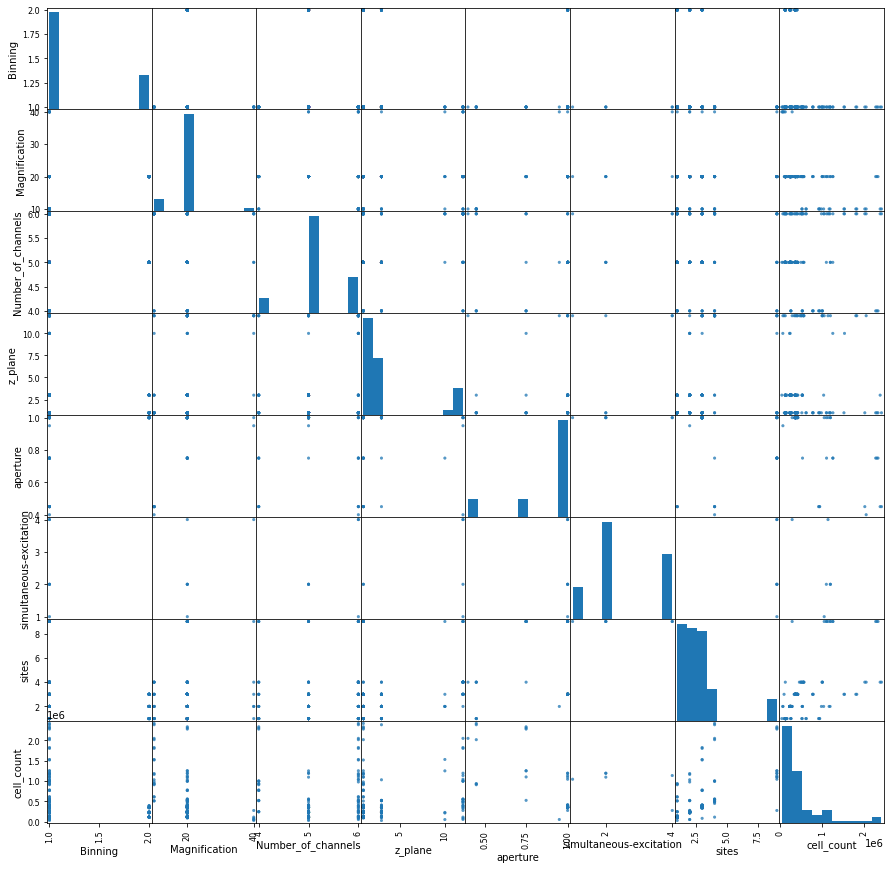

In [8]:
from pandas.plotting import scatter_matrix

cols = ["Binning", "Magnification", "Number_of_channels", "z_plane", "BF_Zplanes", "spinning-disc", "aperture", 
        "dry-immersion", "vs-brightfield", "simultaneous-excitation", "sites", "cell_count"]

scatter_matrix(df[cols], figsize=(15, 15))

In [26]:
t = utilssphering.find_group_avg_df(df, "Vendor", add_cols={"col1": ["Size_MB", "Mean_Size_MB", lambda x: np.mean(x)]})

In [27]:
t

,Vendor,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching,Mean_Size_MB
0,MolDev,"[47.77777777777778, 17.77777777777778, 56.6666...",45.256410,17.132,"[18.6046511627907, 9.30232558139535, 18.604651...",15.563506,5.559,52.476468
1,Nikon,"[55.55555555555556, 43.333333333333336, 43.333...",45.264190,10.100,"[16.27906976744186, 18.6046511627907, 20.93023...",15.887909,3.327,9.621825
2,PE,"[53.333333333333336, 41.11111111111111, 54.444...",47.356725,14.603,"[13.953488372093023, 11.627906976744184, 18.60...",16.927785,5.261,5.949480
3,Yokogawa_Japan,"[52.22222222222223, 36.66666666666666, 42.2222...",45.317460,12.670,"[20.930232558139537, 13.953488372093023, 18.60...",18.770764,3.673,6.658354
4,Yokogawa_US,"[54.44444444444444, 38.88888888888889, 47.7777...",47.188741,12.853,"[18.6046511627907, 13.953488372093023, 16.2790...",17.667539,4.728,7.992501
